<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Kannada/ULMFiT_Kannada_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/output_kannada_tran.csv', engine='python')
train1

,Unnamed: 0,text,category,trans
0,0,ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...,Negative,{'kn': 'ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್...
1,1,ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...,Positive,{'kn': 'ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ...
2,2,Super sar song,not-Kannada,{'kn': 'ಸೂಪರ್ ಸರ್ ಸಾಂಗ್'}
3,3,Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...,Negative,{'kn': 'ಟಿಕ್ಚೋಕರ್ಸ್ ಪೆರೆಂಟ್ ಸಿಟ್ಯೂಶನ್... ನ್ನೋಡ...
4,4,Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....,Positive,{'kn': 'ಸೂಪರ್ ಸಾಂಗ್ ವೆರಿ ನೈಸ್....'}
...,...,...,...,...
6207,6207,@A.R.W tumbad tanhaji andhadhun aise bahot h...,not-Kannada,{'kn': '@ಏ.ರ್.ಎ ತಂಬದ್ ತಂಜಾಜಿ ಅಂಧಧುನ್ ಐಸ್ಡ್ ಬಹತ...
6208,6208,പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്,not-Kannada,{'kn': 'പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്'}
6209,6209,Bro...nNeen este Roast madudru...China ne beku...,Negative,{'kn': 'ಬ್ರೋ...ನ್ಯೂನ್ ಎಸ್ಟ್ ರೋಸ್ಟ್ ಮಾಡುದ್ರು......
6210,6210,ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...,Positive,{'kn': 'ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತು...


In [3]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
for i in range(len(train1)):
  if train1['category'][i]=='not-Tamil':
    train1['trans'][i]='NaN'

In [5]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train1['category'].append(train1['category'])
train['text']=train1['text'].append(train1['trans'])
train

,category,text
0,Negative,ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...
1,Positive,ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...
2,not-Kannada,Super sar song
3,Negative,Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...
4,Positive,Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....
...,...,...
6207,not-Kannada,@ಏ.ರ್.ಎ ತಂಬದ್ ತಂಜಾಜಿ ಅಂಧಧುನ್ ಐಸ್ಡ್ ಬಹತ್ ಹೈ ಪ್ರ...
6208,not-Kannada,പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്
6209,Negative,ಬ್ರೋ...ನ್ಯೂನ್ ಎಸ್ಟ್ ರೋಸ್ಟ್ ಮಾಡುದ್ರು...ಚೀನಾ ನೇ ...
6210,Positive,ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...


In [6]:
train=train.dropna()

In [7]:
val=pd.read_csv('/content/kannada_sentiment_full_dev.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,text,category
0,Binduge saryagi ugithidira good go ahead we a...,Mixed feelings
1,yen song guru ...super,Positive
2,my fevorat story,not-Kannada
3,Super ತೋಗರಿ ತೀಪ್ಪ,Positive
4,ನಿಮ್ಮ ಮಾತುಗಳು ಅಕ್ಷರಶಃ ಸತ್ಯ... ನಿಮ್ಮ ಈ ಸಾಮಾನ್ಯ ...,Positive
...,...,...
686,@Nandi Parthasarathi ನಿಮ್ಮ ಅಪ್ಪ ದೊಡ್ ಗಾಂಡು ಸೂಳೆಮಗ,Negative
687,Hugi guru badethawke,Negative
688,Trending no.1 wow,Positive
689,@Troll Stupid Fans naanu adikke kano helthirod...,Positive


In [8]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [9]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [10]:
punc(df)
punc(df_test)

            category                                               text
0           Negative  ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...
1           Positive  ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...
2        not-Kannada                                     Super sar song
3           Negative  Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...
4           Positive                          Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....
...              ...                                                ...
6207     not-Kannada  ಏ.ರ್.ಎ ತಂಬದ್ ತಂಜಾಜಿ ಅಂಧಧುನ್ ಐಸ್ಡ್ ಬಹತ್ ಹೈ ಪ್ರಾ...
6208     not-Kannada                  പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്
6209        Negative  ಬ್ರೋ...ನ್ಯೂನ್ ಎಸ್ಟ್ ರೋಸ್ಟ್ ಮಾಡುದ್ರು...ಚೀನಾ ನೇ ...
6210        Positive  ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...
6211  Mixed feelings                                      26 ಎಮ್ ವ್ಯೂಸ್

[12424 rows x 2 columns]
           category                                               text
0    Mixed feelings  Binduge saryagi ug

In [11]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [12]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [13]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (12424 items)
x: LMTextList
xxbos ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನು ಅವಲಂಬಿಸುವುದಿಲ್ಲ . ಅವರು ಮಾನವೀಯತೆಯಲ್ಲಿ ಎಷ್ಟು ಸಮರ್ಥರು ಎನ್ನುವುದನ್ನು ಅವಲಂಬಿಸಿದೆ . ಭಾರತದಲ್ಲಿ ಅನಕ್ಷರತೆ ಇದೆ ಆ ಅನಕ್ಷರಸ್ಥರನ್ನು ಅವರ ಅನಕ್ಷರತೆಯೇ,xxbos ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರೈಬ್ ಮಾಡಿ ನಮ್ಮ ಚನ್ನೆಲ್ಗೆ,xxbos xxmaj super sar song,xxbos xxmaj tiktokers present xxunk ... xxunk ಯಾರು ನಮ್ಮ ವೀಡಿಯೋನೂ,xxbos xxmaj super ಸಾಂಗ್ ವೆರಿ ನೈಸ್ xxrep 4 .
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (691 items)
x: LMTextList
xxbos xxmaj xxunk saryagi xxunk good go xxunk we are xxunk well,xxbos yen song guru ... super,xxbos my xxunk story,xxbos xxmaj super ತೋಗರಿ xxunk,xxbos ನಿಮ್ಮ ಮಾತುಗಳು ಅಕ್ಷರಶಃ ಸತ್ಯ ... ನಿಮ್ಮ ಈ ಸಾಮಾನ್ಯ ಜೀವನ ನೋಡಿ xxunk ಆಯಿತು .
y: LMLabelList
,,,,
Path: .;

Test: None>

In [14]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-02
Min loss divided by 10: 1.00E-01


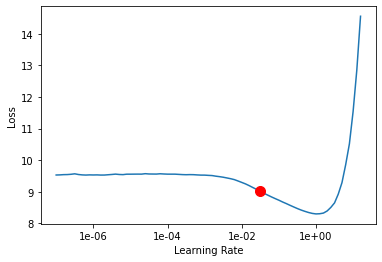

In [15]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)


In [16]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,7.035631,4.766496,0.318973,00:04
1,5.770646,4.615386,0.321875,00:05


In [17]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.845102,4.613046,0.327344,00:06
1,4.298629,4.506950,0.330022,00:06
2,3.580728,4.665430,0.313170,00:06


In [18]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.20E-03
Min loss divided by 10: 3.98E-03


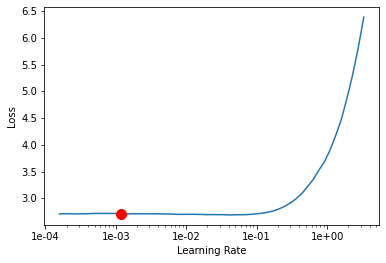

In [19]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [20]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.758496,4.703472,0.310938,00:05
1,2.602609,4.785505,0.305469,00:05
2,2.404198,4.791067,0.306808,00:05


In [21]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-03
Min loss divided by 10: 1.91E-03


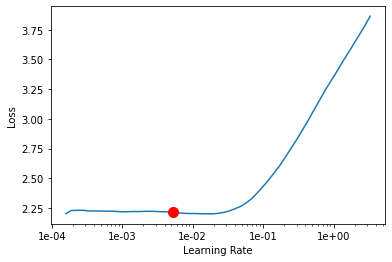

In [22]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [23]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.235814,4.937442,0.292969,00:05
1,2.153126,5.027099,0.300335,00:05
2,2.025380,5.061377,0.291964,00:05


In [24]:
#save the encoder model
learn.save_encoder('my_encoder')

In [25]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [26]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12424 items)
x: TextList
xxbos ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನು ಅವಲಂಬಿಸುವುದಿಲ್ಲ . ಅವರು ಮಾನವೀಯತೆಯಲ್ಲಿ ಎಷ್ಟು ಸಮರ್ಥರು ಎನ್ನುವುದನ್ನು ಅವಲಂಬಿಸಿದೆ . ಭಾರತದಲ್ಲಿ ಅನಕ್ಷರತೆ ಇದೆ ಆ ಅನಕ್ಷರಸ್ಥರನ್ನು ಅವರ ಅನಕ್ಷರತೆಯೇ,xxbos ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರೈಬ್ ಮಾಡಿ ನಮ್ಮ ಚನ್ನೆಲ್ಗೆ,xxbos xxmaj super sar song,xxbos xxmaj tiktokers present xxunk ... xxunk ಯಾರು ನಮ್ಮ ವೀಡಿಯೋನೂ,xxbos xxmaj super ಸಾಂಗ್ ವೆರಿ ನೈಸ್ xxrep 4 .
y: CategoryList
Negative,Positive,not-Kannada,Negative,Positive
Path: .;

Valid: LabelList (691 items)
x: TextList
xxbos xxmaj xxunk saryagi xxunk good go xxunk we are xxunk well,xxbos yen song guru ... super,xxbos my xxunk story,xxbos xxmaj super ತೋಗರಿ xxunk,xxbos ನಿಮ್ಮ ಮಾತುಗಳು ಅಕ್ಷರಶಃ ಸತ್ಯ ... ನಿಮ್ಮ ಈ ಸಾಮಾನ್ಯ ಜೀವನ ನೋಡಿ xxunk ಆಯಿತು .
y: CategoryList
Mixed feelings,Positive,not-Kannada,Positive,Positive
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedd

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-04
Min loss divided by 10: 1.74E-02


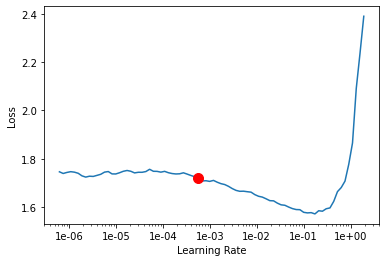

In [27]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [28]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.235437,1.055600,0.590449,0.420629,00:05
1,1.213493,1.060317,0.586107,0.000000,00:05
2,1.172583,1.021338,0.625181,0.550029,00:05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

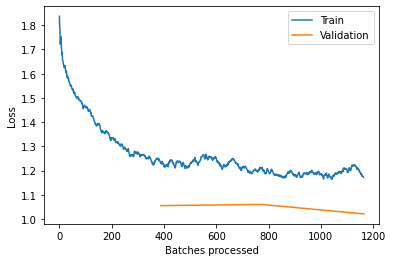

In [29]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 3.98E-03


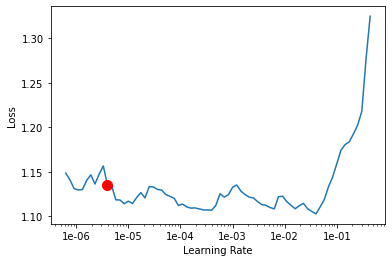

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.172862,0.994501,0.610709,0.436298,00:06
1,1.076567,0.972666,0.622287,0.503308,00:06


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.63E-06


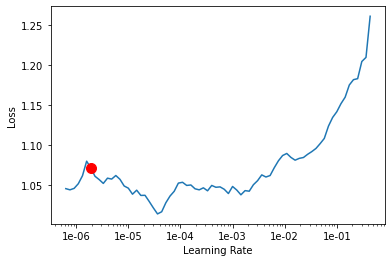

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [33]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.071041,0.972894,0.620839,0.469675,00:10
1,0.901577,0.954670,0.641100,0.529024,00:10


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [34]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.903189,0.964562,0.610709,0.486265,00:13
1,0.714363,0.993934,0.636758,0.531998,00:12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.760634,0.974769,0.648336,0.528488,00:14
1,0.579903,1.074702,0.622287,0.519888,00:13


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.494053,1.088867,0.628075,0.519144,00:14
1,0.451758,1.174829,0.628075,0.522016,00:14
2,0.383438,1.147335,0.642547,0.540959,00:14


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [35]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [36]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,9,7,8,2,6
1,11,83,33,4,5
2,25,39,249,21,16
3,5,3,21,71,10
4,2,7,10,12,32


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[  9   7   8   2   6]
 [ 11  83  33   4   5]
 [ 25  39 249  21  16]
 [  5   3  21  71  10]
 [  2   7  10  12  32]]
0.6425470332850941


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.1731    0.2812    0.2143        32
           1     0.5971    0.6103    0.6036       136
           2     0.7757    0.7114    0.7422       350
           3     0.6455    0.6455    0.6455       110
           4     0.4638    0.5079    0.4848        63

    accuracy                         0.6425       691
   macro avg     0.5310    0.5513    0.5381       691
weighted avg     0.6635    0.6425    0.6516       691

